<a href="https://colab.research.google.com/github/Mariyaa777/PGO-tutorial/blob/main/Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5

## Introduction

### Logistic Regression

**Logistic Regression** is a statistical model used to predict the probability of an event occurring (e.g., $ Y = 1 $) based on one or more explanatory variables $$ X_1, X_2, \ldots, X_n $$

In contrast to linear regression, logistic regression models the probability in such a way that it always stays within the range $[0, 1]$.

It uses the so-called **logistic (sigmoidal) function**, defined as:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$


### Sigmoidal Function

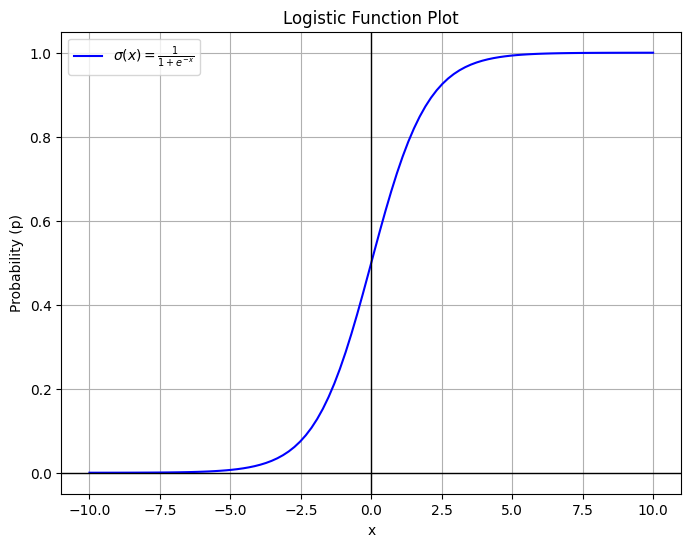

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Values of x
x = np.linspace(-10, 10, 100)

# Calculate the logistic function values
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.title('Logistic Function Plot')
plt.xlabel('x')
plt.ylabel('Probability (p)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Example of Logistic Regression Calculation

Suppose we want to predict the probability that a customer will purchase a product ($Y = 1$),
based on the number of pages viewed ($X$).

The logistic regression model is given by:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Let the model parameters be:
$$
\beta_0 = -4, \quad \beta_1 = 0.8
$$

<br>

### 1. Calculate the probability of purchase when the customer viewed $X = 5$ pages:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 5)}} = \frac{1}{1 + e^{-(0)}} = \frac{1}{2} = 0.5
$$

Thus, the model predicts that the **probability of purchase is 50%**.

<br>

### 2. For $X = 8$ pages:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 8)}} = \frac{1}{1 + e^{-2.4}} \approx 0.916
$$

This means that a customer who viewed 8 pages has about **91.6% chance of purchas**


### Difference Between Linear and Logistic Regression

**1. Linear Regression**

- Used to predict **continuous values**.  
- The model takes the form:
$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \varepsilon
$$
- The result $y$ can take any real value.

**2. Logistic Regression**

- Used to predict the **probability of an event**, most often binary classification.  
- The model takes the form:
$$
p = P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$
- The result $p$ always lies within the range $[0, 1]$.

<br><br>

**Summary at a glance**:

| Feature              | Linear Regression        | Logistic Regression      |
|----------------------|--------------------------|--------------------------|
| Dependent variable type | Continuous               | Binary (0/1)             |
| Model output         | Any real number          | Probability [0,1]        |
| Activation function  | None / Linear            | Sigmoid                 |


### Example of Logistic Regression in Python Code


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


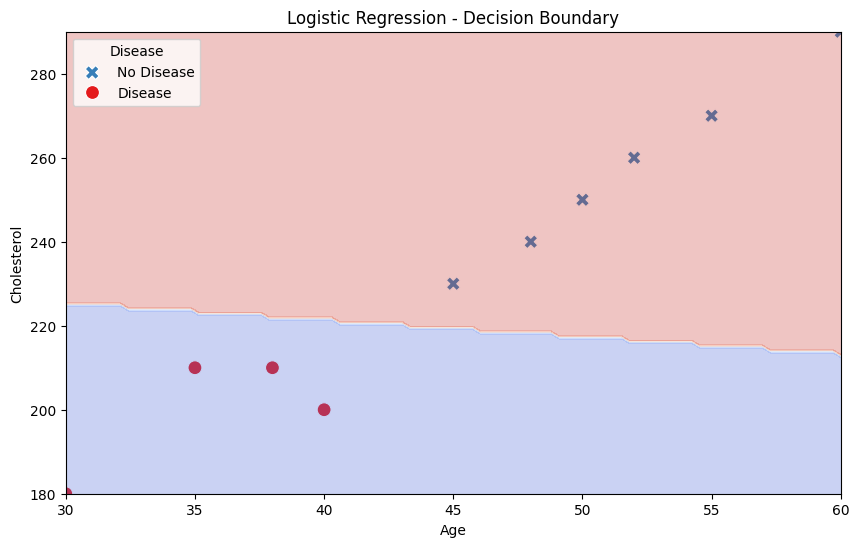

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Creating sample data
data = {
    'Age': [45, 50, 38, 60, 55, 40, 30, 35, 48, 52],
    'Cholesterol': [230, 250, 210, 290, 270, 200, 180, 210, 240, 260],
    'Has_Disease': [1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Split the data into independent variables (X) and dependent variable (y)
X = df[['Age', 'Cholesterol']]  # Independent variables
y = df['Has_Disease']  # Dependent variable

# Split the data into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict results on the test set
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of data distribution with disease label
sns.scatterplot(x='Age', y='Cholesterol', hue='Has_Disease', style='Has_Disease', data=df, palette="Set1", s=100)

# Generate prediction values based on the model
xx, yy = np.meshgrid(np.linspace(X['Age'].min(), X['Age'].max(), 100),
                     np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary of logistic regression
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.title("Logistic Regression - Decision Boundary")
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Disease', loc='upper left', labels=["No Disease", "Disease"])
plt.show()


### Metrics for Model Evaluation in Classification Tasks

# 1. Accuracy

Accuracy measures the percentage of correct predictions made by the model. If we have:

- \(TP\) – True Positives  
- \(TN\) – True Negatives  
- \(FP\) – False Positives  
- \(FN\) – False Negatives  

accuracy is defined as:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

<br>

# 2. Precision

Precision tells us what percentage of observations predicted as positive are actually positive:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

<br>

# 3. Recall / Sensitivity

Sometimes it is also useful to calculate recall, which measures the model's ability to detect true positives:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

<br>

# 4. F1-score

The F1-score is a metric that combines both precision and recall into a single value. It is the **harmonic mean** of precision and recall, accounting for both false positives and false negatives.

Definition:

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

where:

- $\text{Precision} = \frac{TP}{TP + FP}$
- $\text{Recall} = \frac{TP}{TP + FN}$

F1-score is particularly useful when classes are imbalanced, as it accounts for both precision and recall.

<br><br>

| Metric | Definition | Formula |
|--------|------------|---------|
| **Accuracy** | The percentage of correctly classified cases | $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$ |
| **Precision** | The percentage of true positives among those predicted as positive | $$\text{Precision} = \frac{TP}{TP + FP}$$ |
| **Recall / Sensitivity** | The percentage of true positives detected by the model | $$\text{Recall} = \frac{TP}{TP + FN}$$ |
| **Specificity** | The percentage of true negatives detected by the model | $$\text{Specificity} = \frac{TN}{TN + FP}$$ |
| **F1-score** | The harmonic mean of precision and recall | $$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ |

### Example of Using Metrics for Logistic Regression in Python Code


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

np.random.seed(123)
data = {
    'Age': np.random.randint(30, 70, size=100),
    'Cholesterol': np.random.randint(180, 300, size=100),
    'Has_Disease': np.random.randint(0, 2, size=100)  # random 0 or 1
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the data into independent variables (X) and dependent variable (y)
X = df[['Age', 'Cholesterol']]
y = df['Has_Disease']

# Split the data into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the results on the test set
y_pred = model.predict(X_test)

# Check model accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Model accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')


Model accuracy: 75.00%
Precision: 70.59%
Recall: 100.00%
F1-score: 82.76%


## Exercise
For the dataset `heart_disease_uci.csv`, perform DEA analysis and logistic regression for the attribute `num`.

### Column Descriptions

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type  
  - Values: `[typical angina, atypical angina, non-anginal, asymptomatic]`
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results  
  - Values: `[normal, stt abnormality, lv hypertrophy]`
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina  
  - Values: `[True, False]`
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**:  
  - Values: `[normal, fixed defect, reversible defect]`
- **num**: The predicted attribute


Make sure to:
- Check for missing data,
- Check for correlation between features,
- Look for outliers,
- Validate the model using metrics,
- Visualize the data and results.


Dataset shape: (920, 16)
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4          

/tmp/ipython-input-2201633249.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])    # fill categorical columns with mode


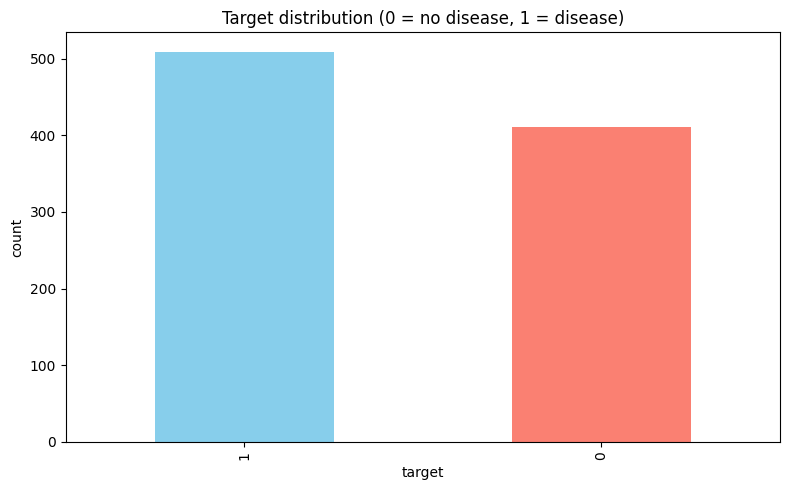

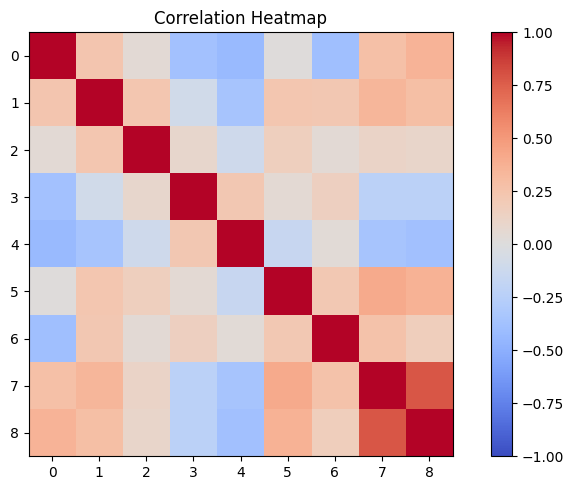

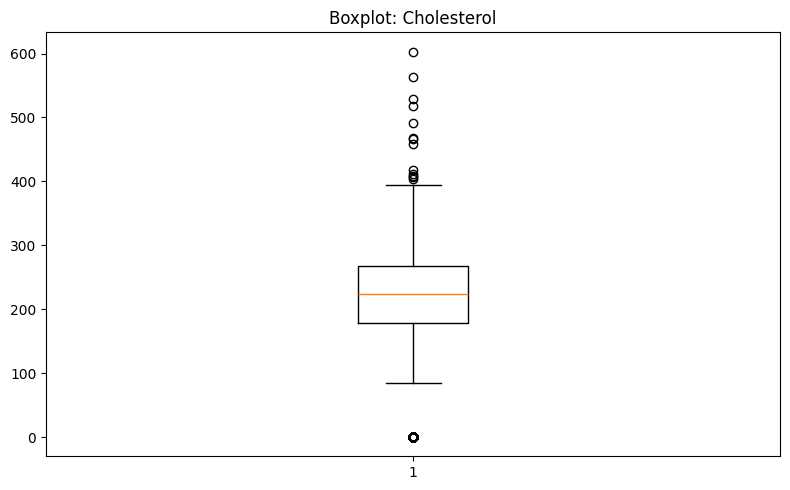


 MODEL METRICS
Accuracy : 0.832
Precision: 0.868
Recall   : 0.844
F1-score : 0.856


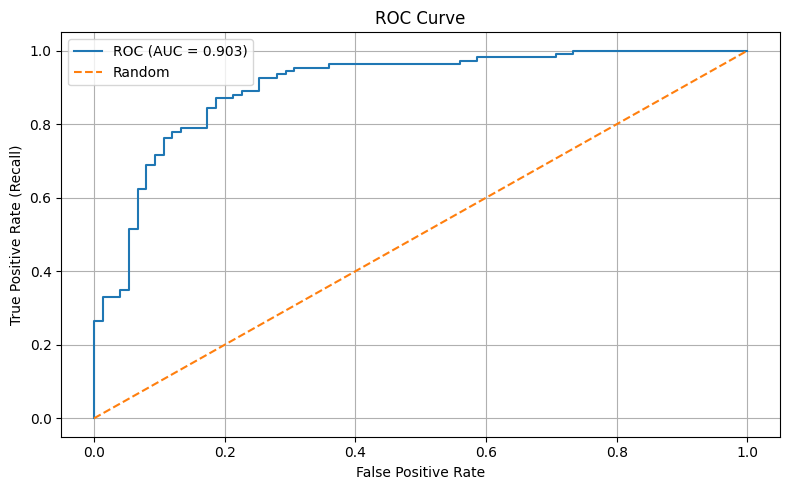

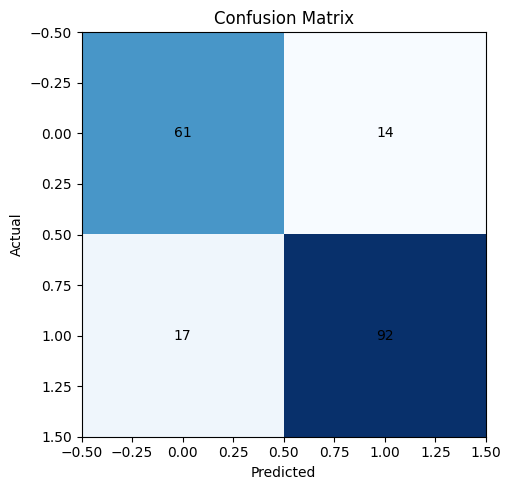

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, roc_auc_score
)

df = pd.read_csv('heart_disease_uci.csv')
print("Dataset shape:", df.shape)
print(df.head())


print("\nMissing values per column:")
print(df.isna().sum())


for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(exclude=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


df['target'] = (df['num'] > 0).astype(int)
print("\nTarget value distribution:")
print(df['target'].value_counts())

df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target distribution (0 = no disease, 1 = disease)')
plt.xlabel('target')
plt.ylabel('count')
plt.tight_layout()
plt.show()


corr = df.select_dtypes(include=[np.number]).corr()
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


plt.boxplot(df['chol'])
plt.title('Boxplot: Cholesterol')
plt.tight_layout()
plt.show()


X = df.drop(columns=['id', 'num', 'target'], errors='ignore')
y = df['target']


X = pd.get_dummies(X, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


model = LogisticRegression(max_iter=5000, solver='lbfgs')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n MODEL METRICS")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")


y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], '--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center')
plt.tight_layout()
plt.show()
